In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
!head /content/sales_data.csv

head: cannot open '/content/sales_data.csv' for reading: No such file or directory


In [ ]:
sales = pd.read_csv('https://raw.githubusercontent.com/ine-rmotr-curriculum/FreeCodeCamp-Pandas-Real-Life-Example/master/data/sales_data.csv')

In [ ]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [ ]:
sales.shape

(113036, 18)

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [ ]:
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [ ]:
sales['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [ ]:
sales['Unit_Cost'].mean()

267.296365759581

In [ ]:
sales['Unit_Cost'].median()

9.0

## A boxplot is a graph that gives you a good indication of how the values in the data are spread out. 
# Less space
Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

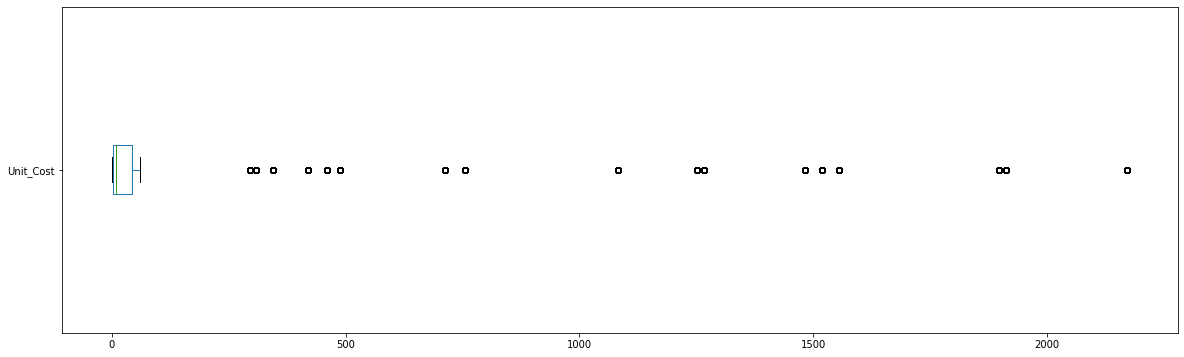

In [ ]:
sales['Unit_Cost'].plot(kind='box', vert=False, figsize=(20,6))

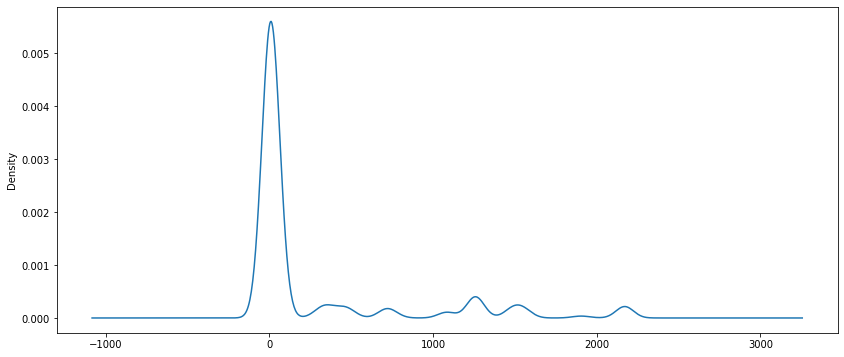

In [ ]:
sales['Unit_Cost'].plot(kind='density',figsize=(14,6))

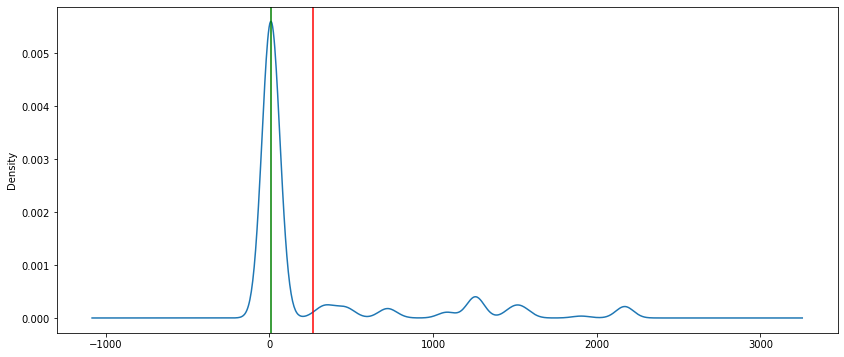

In [ ]:
ax = sales['Unit_Cost'].plot(kind='density',figsize=(14,6))
ax.axvline(sales['Unit_Cost'].mean(),color='red')     
ax.axvline(sales['Unit_Cost'].median(),color='green')

Text(0.5, 0, 'Dollars')

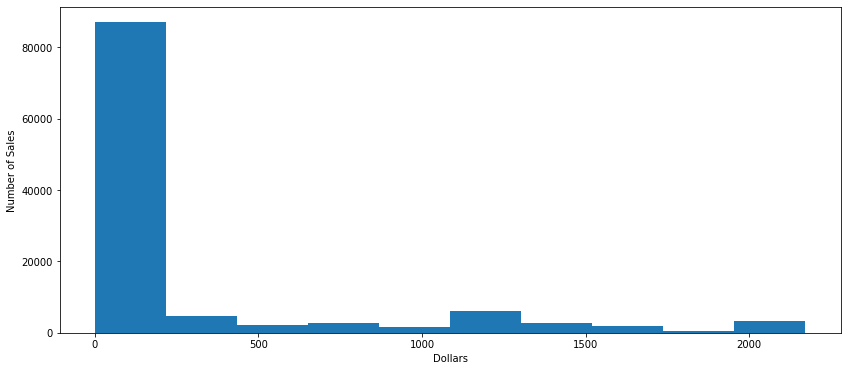

In [ ]:
ax = sales['Unit_Cost'].plot(kind='hist',figsize=(14,6))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('Dollars')

In [ ]:
sales['Age_Group'].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

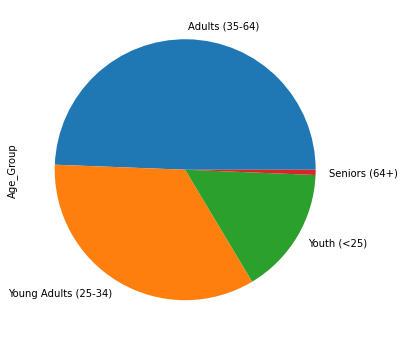

In [ ]:
sales['Age_Group'].value_counts().plot(kind='pie',figsize=(6,6))

Text(0, 0.5, 'Number of salaes')

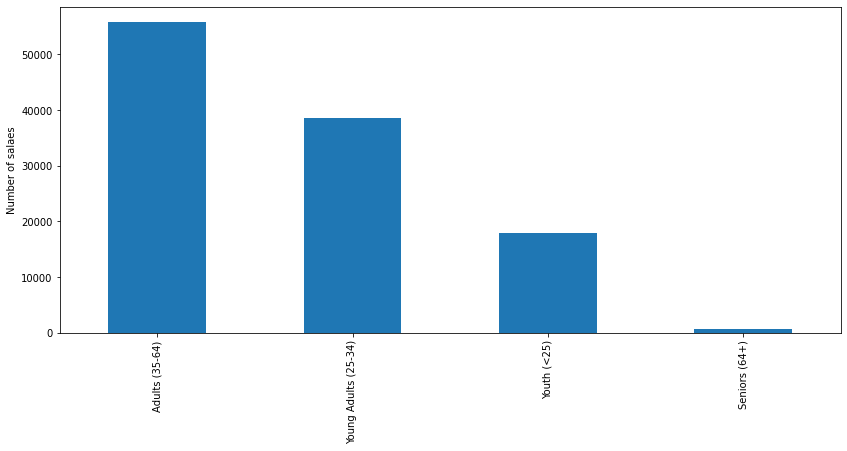

In [ ]:
ax = sales['Age_Group'].value_counts().plot(kind='bar',figsize=(14,6))
ax.set_ylabel('Number of salaes')

##RELATIONSHIP BETWEEN COLUMNS ?
#+ve corr --> directly proportional
#-ve corr --> inversly proportional


In [ ]:
corr = sales.corr()
corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


([<matplotlib.axis.YTick at 0x7fb7e7399e50>,
 [Text(0, 0, 'Day'),
  Text(0, 0, 'Year'),
  Text(0, 0, 'Customer_Age'),
  Text(0, 0, 'Order_Quantity'),
  Text(0, 0, 'Unit_Cost'),
  Text(0, 0, 'Unit_Price'),
  Text(0, 0, 'Profit'),
  Text(0, 0, 'Cost'),
  Text(0, 0, 'Revenue')])

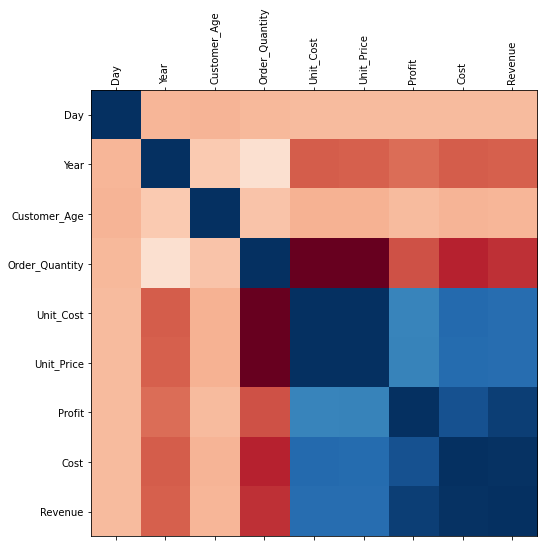

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)),corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)),corr.columns)

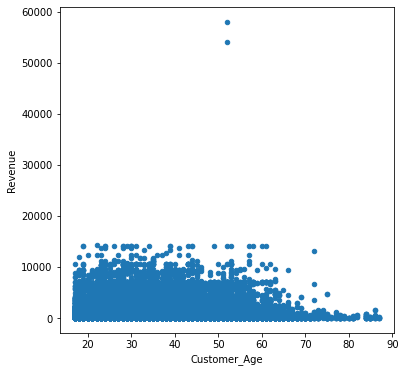

In [ ]:
sales.plot(kind='scatter', x='Customer_Age', y='Revenue', figsize=(6,6))

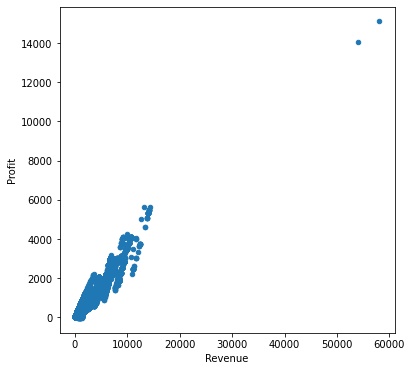

In [ ]:
sales.plot(kind='scatter', x='Revenue', y='Profit', figsize=(6,6))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


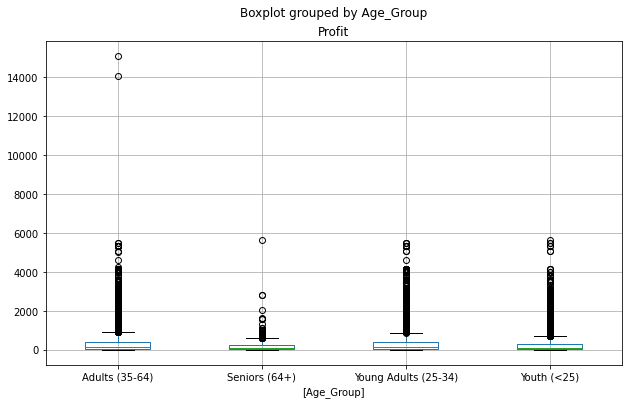

In [ ]:
ax = sales[['Profit', 'Age_Group']].boxplot(by='Age_Group', figsize=(10,6))

Year                 AxesSubplot(0.125,0.536818;0.227941x0.343182)
Customer_Age      AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Order_Quantity    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Unit_Cost               AxesSubplot(0.125,0.125;0.227941x0.343182)
Unit_Price           AxesSubplot(0.398529,0.125;0.227941x0.343182)
Profit               AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

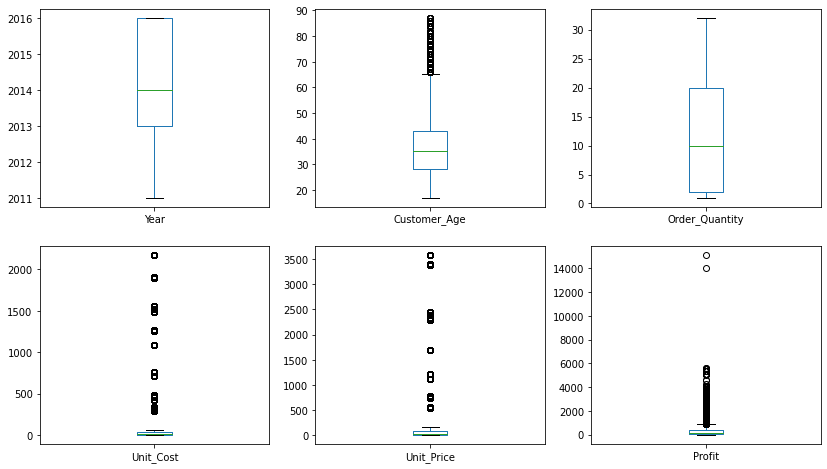

In [ ]:
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity','Unit_Cost', 'Unit_Price','Profit']
sales[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

### COLUMN WRANGliNG
add and calculate Rev_per_age

In [ ]:
sales['Rev_per_age'] = sales['Revenue']/sales['Customer_Age']
sales['Rev_per_age'].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Rev_per_age, dtype: float64

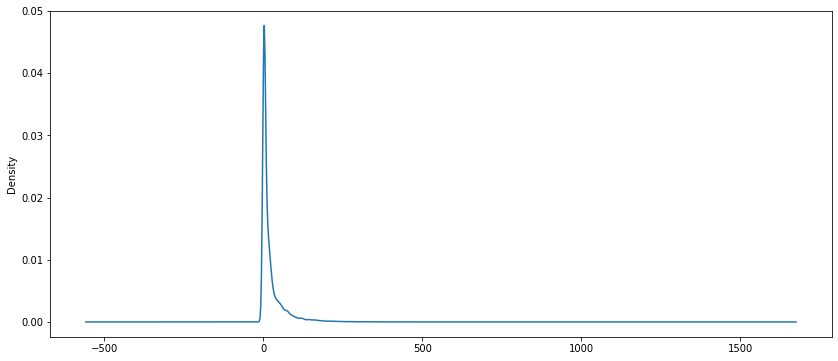

In [ ]:
sales['Rev_per_age'].plot(kind='density', figsize=(14,6))

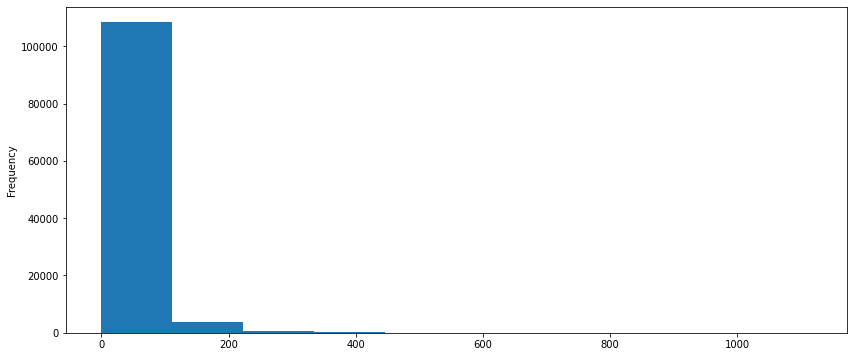

In [ ]:
sales['Rev_per_age'].plot(kind='hist', figsize=(14,6))

ADD AND CALCULATE A NEW CALCULATED COST COLUMN
CALCULATED COST = ORDER_QUANTITY * UNIT_COST

In [ ]:
sales['calc_cost'] = sales['Order_Quantity'] * sales['Unit_Cost']
sales['calc_cost'].head()

0     360
1     360
2    1035
3     900
4     180
Name: calc_cost, dtype: int64

In [ ]:
(sales['calc_cost'] != sales['Cost']).sum()

0

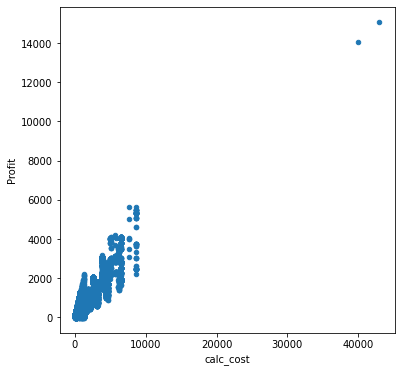

In [ ]:
sales.plot(kind='scatter', x='calc_cost', y='Profit',figsize=(6,6))

In [ ]:
sales['Calc_Rev'] = sales['Cost'] + sales['Profit']
sales['Calc_Rev'].head()

0     950
1     950
2    2401
3    2088
4     418
Name: Calc_Rev, dtype: int64

In [ ]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Rev_per_age,calc_cost,Calc_Rev
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,49.000000,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,42.612245,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,8.893617,180,418


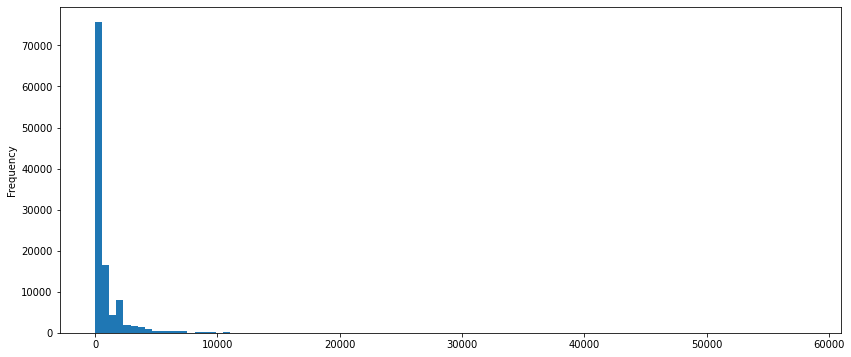

In [ ]:
sales["Revenue"].plot(kind='hist', bins=100, figsize=(14,6))

Modifying Unit_Price values adding %3 to them

In [ ]:
sales['Unit_Price'].head()

0    120
1    120
2    120
3    120
4    120
Name: Unit_Price, dtype: int64

In [ ]:
sales['Unit_Price'] = 1.03 * sales['Unit_Price']
sales['Unit_Price'].head()

0    123.6
1    123.6
2    123.6
3    123.6
4    123.6
Name: Unit_Price, dtype: float64

# Get all the sales made in the name of Kentucky

In [ ]:
sales.loc[sales['State'] == 'Kentucky']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Rev_per_age,calc_cost,Calc_Rev
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,12,8,22.66,142,96,238,5.950,96,238
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,14,8,22.66,165,112,277,6.925,112,277
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Helmets,"Sport-100 Helmet, Blue",29,13,36.05,537,377,914,22.850,377,914
31447,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Helmets,"Sport-100 Helmet, Blue",31,13,36.05,574,403,977,24.425,403,977
79670,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,2,11,30.90,32,22,54,1.350,22,54
79671,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,21,11,30.90,336,231,567,14.175,231,567
79672,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,1,11,30.90,16,11,27,0.675,11,27
79673,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,18,11,30.90,288,198,486,12.150,198,486


#Get mean revenue of Adults(35-64) sales group

In [ ]:
sales.loc[sales['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean()

762.8287654055604

#How many reocrds belong to age group Youths (<25) or Adults (35-64)


In [ ]:
sales.loc[(sales['Age_Group'] == 'Adults (35-64)') | (sales['Age_Group'] == 'Youths (<25)')].shape[0] 

55824

#Get mean Revenue of sales group Adults in United States

In [ ]:
sales.loc[(sales['Age_Group'] == 'Adults (35-64)') & (sales['Country'] == 'United States'), 'Revenue'].mean()

726.7260473588342

#Increase the revenue by 10% to every sale made in France.

In [ ]:
sales['Revenue'].head()

0     950
1     950
2    2401
3    2088
4     418
Name: Revenue, dtype: int64

In [ ]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

50     787
51     787
52    2957
53    2851
60     626
Name: Revenue, dtype: int64

In [ ]:
sales.loc[sales['Country'] == 'France', 'Revenue'] = sales.loc[sales['Country'] == 'France', 'Revenue'] * 1.1
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

50     865.7
51     865.7
52    3252.7
53    3136.1
60     688.6
Name: Revenue, dtype: float64

What is mean of Customer_Age

In [ ]:
sales['Customer_Age'].mean()

35.91921157861212

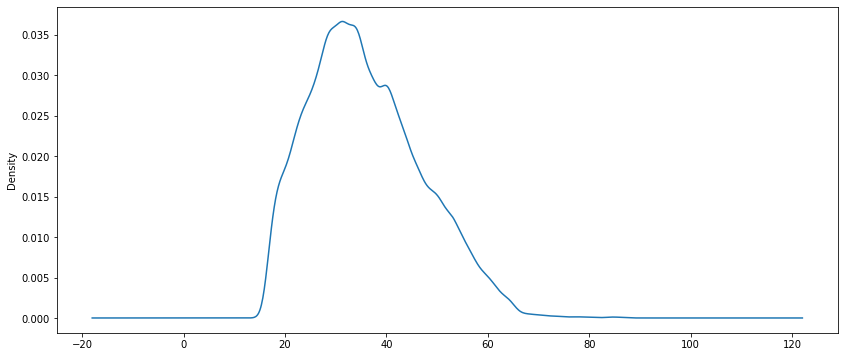

In [ ]:
sales['Customer_Age'].plot(kind='density', figsize=(14,6))

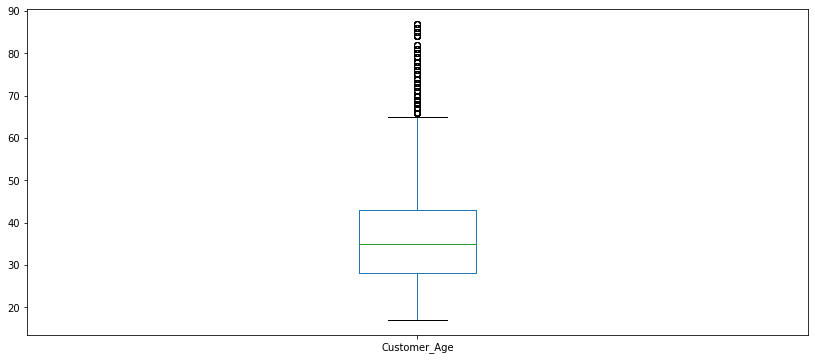

In [ ]:
sales['Customer_Age'].plot(kind='box',vert='True',figsize=(14,6))

MEan of Order_Quantity

In [ ]:
sales['Order_Quantity'].mean()

11.901659648253654

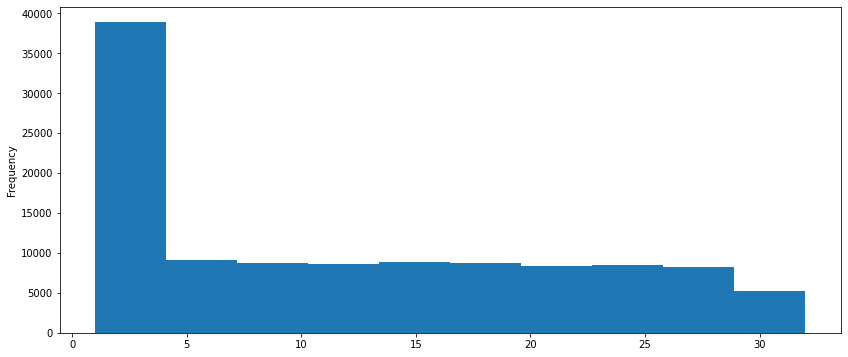

In [ ]:
sales['Order_Quantity'].plot(kind='hist', figsize=(14,6))

How many sales per year do we have?

In [ ]:
sales['Year'].value_counts()

2016    29398
2014    29398
2015    24443
2013    24443
2012     2677
2011     2677
Name: Year, dtype: int64

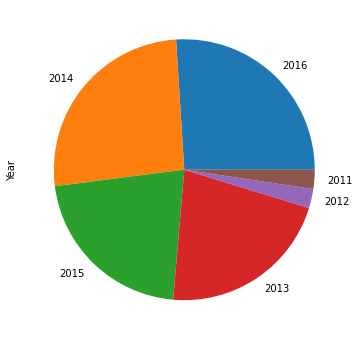

In [ ]:
sales['Year'].value_counts().plot(kind='pie', figsize=(6,6))

How many sales per month ?

In [ ]:
sales['Month'].value_counts()

June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: Month, dtype: int64

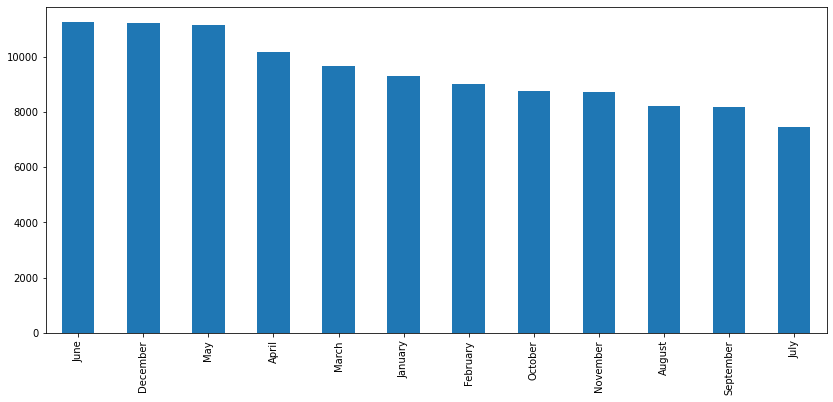

In [ ]:
sales['Month'].value_counts().plot(kind='bar', figsize=(14,6))

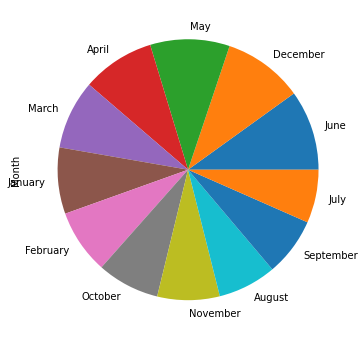

In [ ]:
sales['Month'].value_counts().plot(kind='pie', figsize=(6,6))

WHich country has the most sales quantity of sales ?

In [ ]:
sales['Country'].value_counts().head(1)

United States    39206
Name: Country, dtype: int64

In [ ]:
sales['Country'].value_counts()

United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: Country, dtype: int64

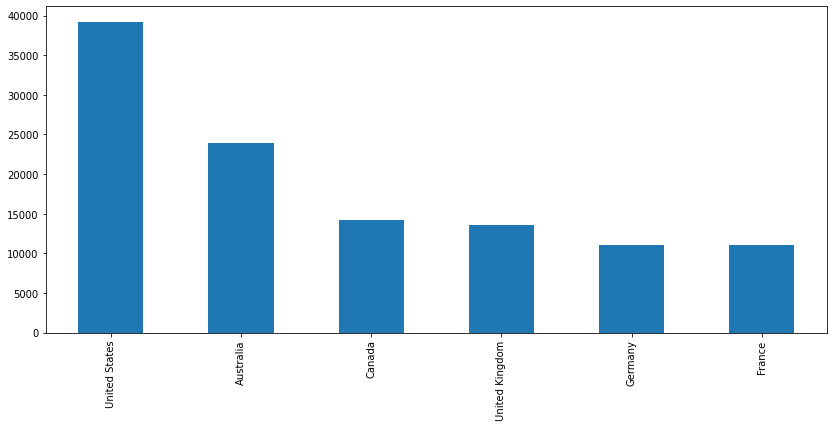

In [ ]:
sales['Country'].value_counts().plot(kind='bar', figsize=(14,6))

Create a list of every product sold

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              113036 non-null  object 
 1   Day               113036 non-null  int64  
 2   Month             113036 non-null  object 
 3   Year              113036 non-null  int64  
 4   Customer_Age      113036 non-null  int64  
 5   Age_Group         113036 non-null  object 
 6   Customer_Gender   113036 non-null  object 
 7   Country           113036 non-null  object 
 8   State             113036 non-null  object 
 9   Product_Category  113036 non-null  object 
 10  Sub_Category      113036 non-null  object 
 11  Product           113036 non-null  object 
 12  Order_Quantity    113036 non-null  int64  
 13  Unit_Cost         113036 non-null  int64  
 14  Unit_Price        113036 non-null  float64
 15  Profit            113036 non-null  int64  
 16  Cost              11

In [ ]:
sales['Product'].unique()

array(['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand',
       'Mountain Bottle Cage', 'Water Bottle - 30 oz.',
       'Road Bottle Cage', 'AWC Logo Cap', 'Bike Wash - Dissolver',
       'Fender Set - Mountain', 'Half-Finger Gloves, L',
       'Half-Finger Gloves, M', 'Half-Finger Gloves, S',
       'Sport-100 Helmet, Black', 'Sport-100 Helmet, Red',
       'Sport-100 Helmet, Blue', 'Hydration Pack - 70 oz.',
       'Short-Sleeve Classic Jersey, XL',
       'Short-Sleeve Classic Jersey, L', 'Short-Sleeve Classic Jersey, M',
       'Short-Sleeve Classic Jersey, S', 'Long-Sleeve Logo Jersey, M',
       'Long-Sleeve Logo Jersey, XL', 'Long-Sleeve Logo Jersey, L',
       'Long-Sleeve Logo Jersey, S', 'Mountain-100 Silver, 38',
       'Mountain-100 Silver, 44', 'Mountain-100 Black, 48',
       'Mountain-100 Silver, 48', 'Mountain-100 Black, 38',
       'Mountain-200 Silver, 38', 'Mountain-100 Black, 44',
       'Mountain-100 Silver, 42', 'Mountain-200 Black, 46',
       'Mountain-200 Silver

In [ ]:
sales['Product'].value_counts()

Water Bottle - 30 oz.      10794
Patch Kit/8 Patches        10416
Mountain Tire Tube          6816
AWC Logo Cap                4358
Sport-100 Helmet, Red       4220
                           ...  
Touring-3000 Blue, 50         58
Mountain-100 Silver, 42       54
Mountain-500 Silver, 48       40
Road-650 Red, 52              32
Mountain-500 Black, 52        22
Name: Product, Length: 130, dtype: int64

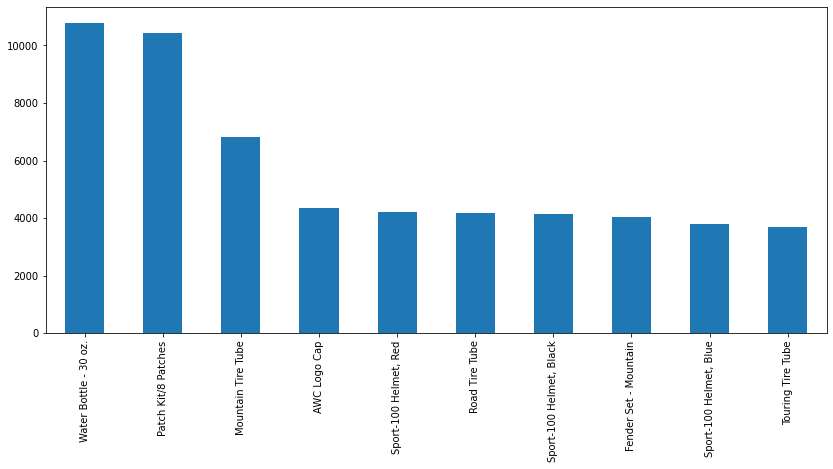

In [ ]:
sales['Product'].value_counts().head(10).plot(kind='bar', figsize=(14,6))

Relationship between Unit_cost and Unit_price

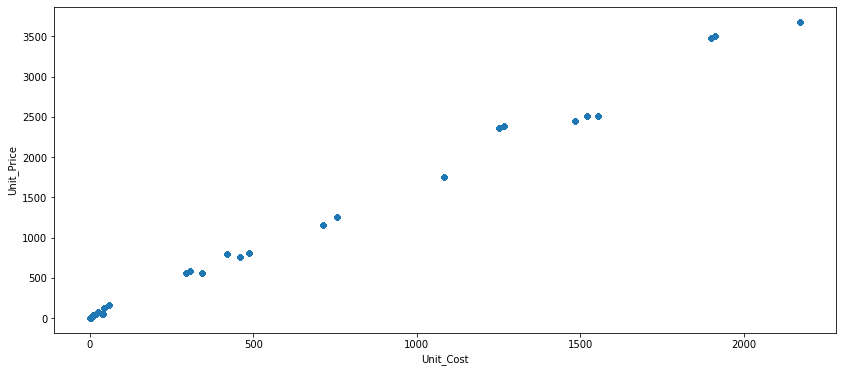

In [ ]:
sales.plot(kind='scatter', x='Unit_Cost', y='Unit_Price', figsize=(14,6))

Realtionship between Order_quantity and Profit ?

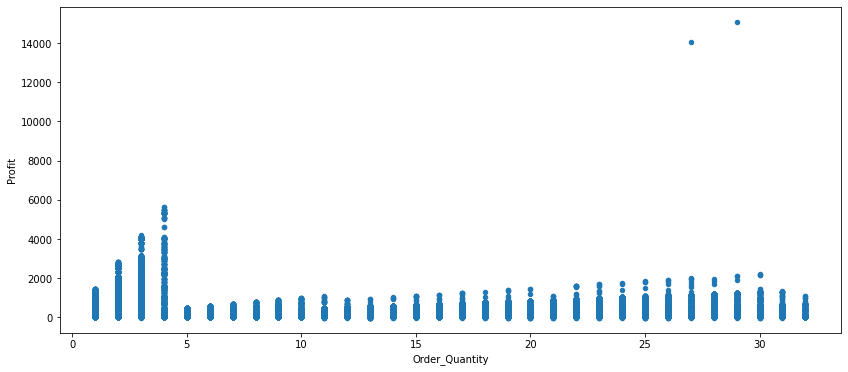

In [ ]:
sales.plot(kind='scatter', x='Order_Quantity', y='Profit', figsize=(14,6))

Relationship between Profit per Country

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


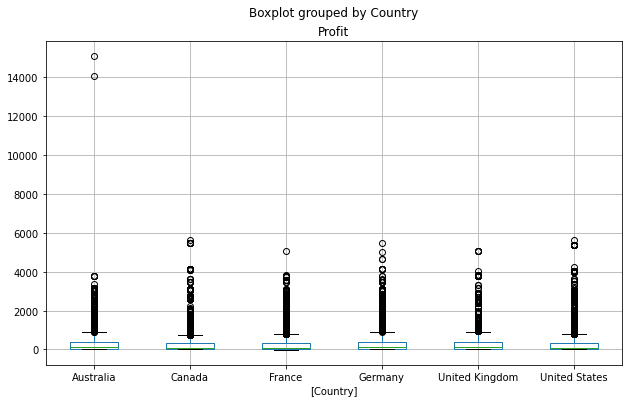

In [ ]:
sales[['Profit','Country']].boxplot(by='Country', figsize=(10,6))

Relationship between Customer_Age per country

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


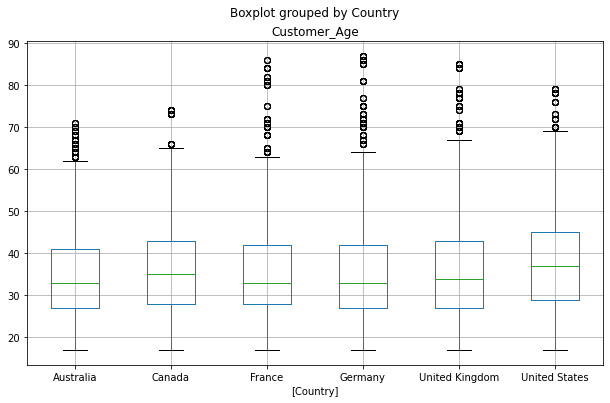

In [ ]:
sales[['Customer_Age','Country']].boxplot(by='Country', figsize=(10,6))

Add and calculate a new Calculated_Date column

In [ ]:
sales['Calculated_Date'] = sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)
sales['Calculated_Date'].head()

0    2013-November-26
1    2015-November-26
2       2014-March-23
3       2016-March-23
4         2014-May-15
Name: Calculated_Date, dtype: object

How did sales evolve throughout the year?

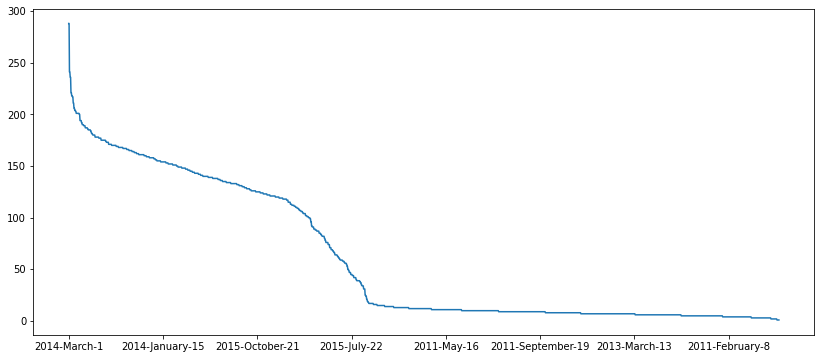

In [ ]:
sales['Calculated_Date'].value_counts().plot(kind='line',figsize=(14,6))

Increase $50 revenue to every sale

In [ ]:
sales['Revenue'] += 50

How many orders were made in Canada or France ?

In [ ]:
sales.loc[(sales['Country'] == 'France') | (sales['Country'] == 'Canada')].shape[0]

25176

How many bike racks were ordered from Canada?

In [ ]:
sales.loc[(sales['Country'] == 'Canada') & (sales['Sub_Category'] == 'Bike Racks')].shape[0]

104

How many orders were made in each region (state) of France?

In [ ]:
sales.loc[sales['Country'] == 'France', 'State'].value_counts()

Seine (Paris)        2328
Seine Saint Denis    1684
Nord                 1670
Hauts de Seine       1084
Essonne               994
Yveline               954
Seine et Marne        394
Moselle               386
Loiret                382
Val d'Oise            264
Garonne (Haute)       208
Val de Marne          158
Charente-Maritime     148
Somme                 134
Loir et Cher          120
Pas de Calais          90
Name: State, dtype: int64

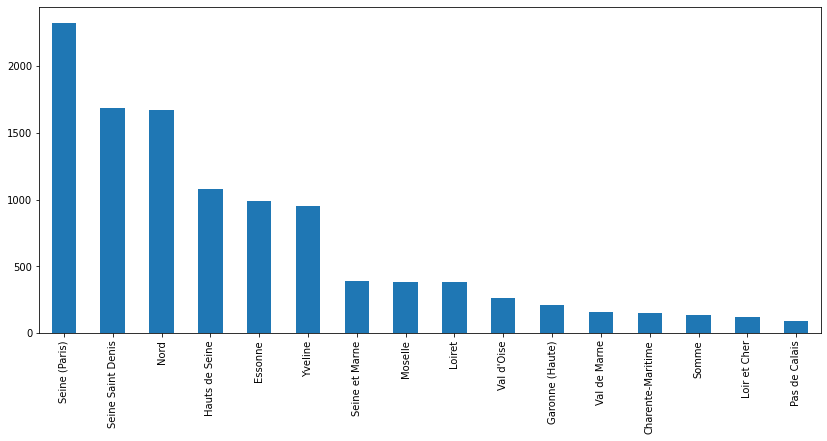

In [ ]:
sales.loc[sales['Country'] == 'France', 'State'].value_counts().plot(kind='bar', figsize=(14,6))

How many sales were made per category?

In [ ]:
sales['Sub_Category'].value_counts()

Tires and Tubes      33870
Bottles and Cages    15876
Road Bikes           13430
Helmets              12158
Mountain Bikes        8854
Jerseys               6010
Caps                  4358
Fenders               4032
Touring Bikes         3698
Gloves                2686
Cleaners              1802
Shorts                1794
Hydration Packs       1334
Socks                 1122
Vests                  964
Bike Racks             592
Bike Stands            456
Name: Sub_Category, dtype: int64

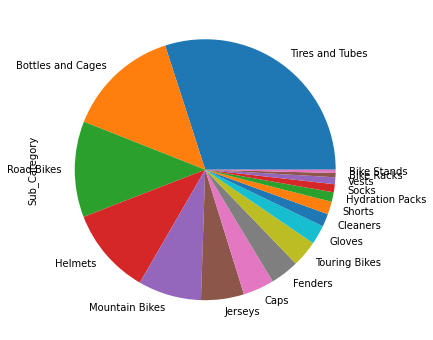

In [ ]:
sales['Sub_Category'].value_counts().plot(kind='pie', figsize=(6,6))